# Comparing Temperature and Salinity Measurements From DO sensors and CTDs at the Global Irminger Station Flanking Moorings A and B


For reference, we will be using the [DO (30 m), CTD (30 m), and CTD (40 m) on Global Irminger Sea Flanking Moorings A and B]

http://ooi.visualocean.net/instruments/view/GI03FLMA-RIS01-03-DOSTAD000

http://ooi.visualocean.net/instruments/view/GI03FLMA-RIM01-02-CTDMOG040

http://ooi.visualocean.net/instruments/view/GI03FLMA-RIM01-02-CTDMOG041

http://ooi.visualocean.net/instruments/view/GI03FLMB-RIS01-03-DOSTAD000

http://ooi.visualocean.net/instruments/view/GI03FLMB-RIM01-02-CTDMOG060

http://ooi.visualocean.net/instruments/view/GI03FLMB-RIM01-02-CTDMOG061

## 1. Selected instruments included in this report
In this report, we will evaluate the CTD (specifically temperature and salinity) from the Global Irminger Mooring Riser A and B Pioneer Upstream Offshore Profiler (GI03FLMA/GI03FLMB), focusing on the summer of 2017 (Deployment 4). 

Mooring Riser A:

Instrument | Reference Designator | Method | Stream 
 -- | -- | -- | --
Dissolved Oxygen |GI03FLMA-RIS01-03-DOSTAD000| recovered_host | dosta_abcdjm_sio_instrument_recovered
CTD 30m | GI03FLMA-RIM01-02-CTDMOG040 | recovered_inst | ctdmo_ghqr_instrument_recovered
CTD 40m | GI03FLMA-RIM01-02-CTDMOG041 | recovered_inst | ctdmo_ghqr_instrument_recovered

Mooring Riser B:

Instrument | Reference Designator | Method | Stream 
 -- | -- | -- | --
Dissolved Oxygen | GI03FLMB-RIS01-03-DOSTAD000| recovered_host | dosta_abcdjm_sio_instrument_recovered
CTD 30m | GI03FLMB-RIM01-02-CTDMOG060 | recovered_inst | ctdmo_ghqr_instrument_recovered
CTD 40m | GI03FLMB-RIM01-02-CTDMOG061 | recovered_inst | ctdmo_ghqr_instrument_recovered


We focused on the recovered data as the dataset is more complete. 

## 2. Time periods of interest
We will focus on the following time period for evaluation of Mooring A:
* August 8, 2017 to November 5, 2017 - Part of Deployment 4

And for Mooring B:
* August 7, 2017 to September 29, 2017 - Part of Deployment 4



## 3a. Describing salinity and temperature variation-Mooring A
Now let's take a look at Mooring A, specifically at salinity and temperature. We looked at the part of deployment 4 where there was DO data and concurrent CTD data. First we need to add some additional libraries to our Python environment.

In [ ]:
import requests
import datetime
import time
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set()
import os
import re
import pandas as pd
from bokeh.plotting import figure, output_file, reset_output, show, ColumnDataSource, save
from bokeh.models import BoxAnnotation
from bokeh.io import output_notebook
from bokeh.palettes import Spectral4
import numpy as np

In [2]:
# Instrument Information: Global Irminger Flanking Subsurface Mooring A - DO 30 m

site1 = 'GI03FLMA'
node1 = 'RIS01'
instrument1 = '03-DOSTAD000'
method1 = 'recovered_host'
stream1 = 'dosta_abcdjm_sio_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site1,node1,instrument1,method1,stream1))

#Deployment 4:
params = {
  'beginDT':'2017-08-08T00:00:00.000Z',
  'endDT':'2017-11-05T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

In [ ]:
#print(data['allURLs'][0])

In [3]:
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180802T145614-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html'

In [4]:
single_file = 'https://opendap.oceanobservatories.org//thredds/dodsC/ooi/meredith.burke@dal.ca/20180802T145614-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20170808T160001-20171104T234501.nc'

In [5]:
# Load the data files
ds = xr.open_dataset(single_file)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds = ds.swap_dims({'obs': 'time'})


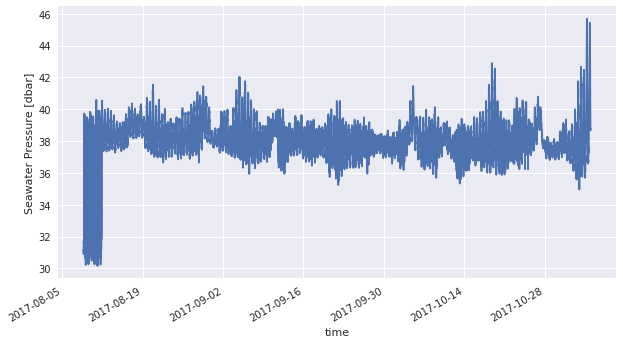

In [6]:
#Check the depth of the sensor:
fig, (ax) = plt.subplots(figsize=(10,5))
ds['int_ctd_pressure'].plot();


In [ ]:
# CTD 30 m

In [7]:
#GI03FLMA-RIM01-02-CTDMOG040

site2 = 'GI03FLMA'
node2 = 'RIM01'
instrument2 = '02-CTDMOG040'
method2 = 'recovered_inst'
stream2 = 'ctdmo_ghqr_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site2,node2,instrument2,method2,stream2))

# All of the following are optional
params2 = {
  'beginDT':'2017-08-08T00:00:00.000Z',
  'endDT':'2017-11-05T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
# r = requests.get(data_request_url, params=params2, auth=(USERNAME, TOKEN))
# data2 = r.json()

In [ ]:
#print(data2['allURLs'][0])

In [8]:
url2='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180803T135131-GI03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'

In [9]:
single_file2 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/meredith.burke@dal.ca/20180802T172152-GI03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered/deployment0004_GI03FLMA-RIM01-02-CTDMOG040-recovered_inst-ctdmo_ghqr_instrument_recovered_20170808T160001-20171104T234501.nc'

In [ ]:
# Load the data files
ds2 = xr.open_dataset(single_file2)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds2 = ds2.swap_dims({'obs': 'time'})

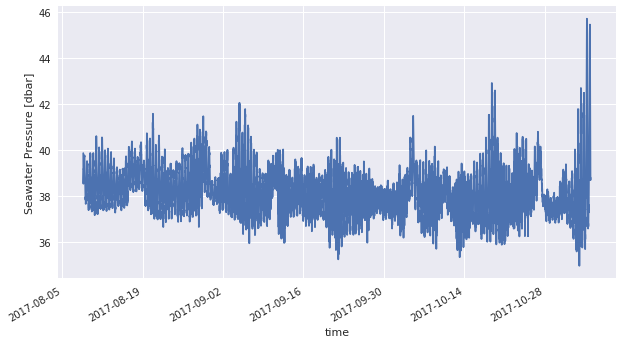

In [11]:
fig, (ax2) = plt.subplots(figsize=(10,5))
ds2['ctdmo_seawater_pressure'].plot();


In [ ]:
##CTD 40 m

In [12]:
#GI03FLMA-RIM01-02-CTDMOG041
site3 = 'GI03FLMA'
node3 = 'RIM01'
instrument3 = '02-CTDMOG041'
method3 = 'recovered_inst'
stream3 = 'ctdmo_ghqr_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site3,node3,instrument3,method3,stream3))

# All of the following are optional
params = {
  'beginDT':'2017-08-08T00:00:00.000Z',
  'endDT':'2017-11-05T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data3 = r.json()

In [ ]:
#print(data3['allURLs'][0])

In [13]:
url3='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180802T161129-GI03FLMA-RIM01-02-CTDMOG041-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'

In [14]:
single_file3 = 'https://opendap.oceanobservatories.org//thredds/dodsC/ooi/meredith.burke@dal.ca/20180802T161129-GI03FLMA-RIM01-02-CTDMOG041-recovered_inst-ctdmo_ghqr_instrument_recovered/deployment0004_GI03FLMA-RIM01-02-CTDMOG041-recovered_inst-ctdmo_ghqr_instrument_recovered_20170808T160001-20171104T234501.nc'

In [15]:
# Load the data files
ds3 = xr.open_dataset(single_file3)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds3 = ds3.swap_dims({'obs': 'time'})

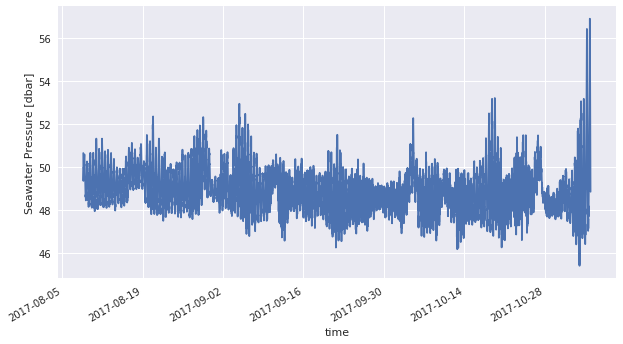

In [16]:
fig, (ax3) = plt.subplots(figsize=(10,5))
ds3['ctdmo_seawater_pressure'].plot();


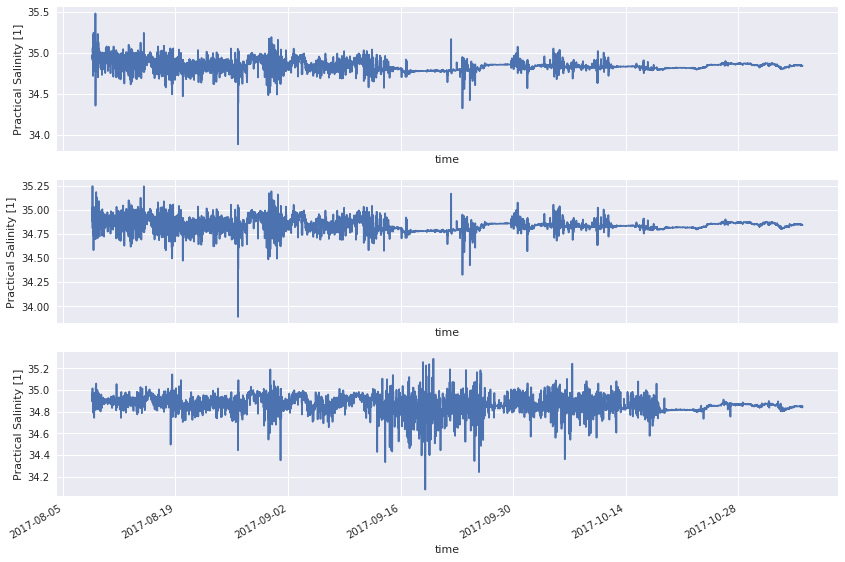

In [17]:
#Plot all 3 salinities
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(14,9))
ds['practical_salinity'].plot(ax=ax1)

ds2['practical_salinity'].plot(ax=ax2)


ds3['practical_salinity'].plot(ax=ax3)

In [101]:
#Plot all 3 on same plot
sal1=ds['practical_salinity']
sal2=ds2['practical_salinity']
sal3=ds3['practical_salinity']
time1=ds['time']

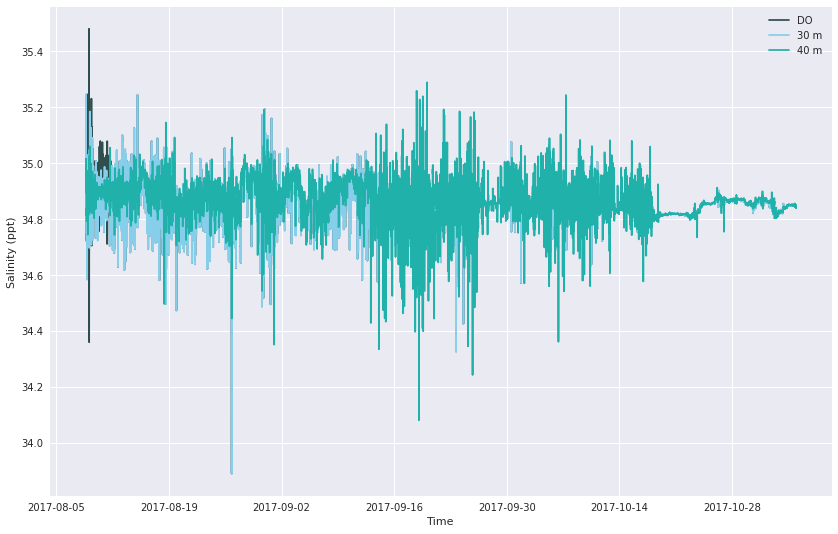

In [102]:
plt.plot(time1, sal1, color='darkslategrey', marker='_', markersize=1, label='DO')
plt.plot(time1, sal2, color='skyblue', marker='_', markersize=1, label='30 m')
plt.plot(time1, sal3, color='lightseagreen', marker='_', markersize=1, label='40 m')
plt.xlabel("Time")
plt.ylabel("Salinity (ppt)")
plt.rcParams["figure.figsize"] = [14,9]
plt.legend()

In [103]:
#Bokeh plot for 
time1 = list(ds['time'].values)
sal11 = list(ds['practical_salinity'].values)
sal22 = list(ds2['practical_salinity'].values)
sal33 = list(ds3['practical_salinity'].values)
name1='DO'
name2='30 m'
name3='40 m'

In [104]:
p = figure(width=800,
           height=400,
           title='Global Irminger Flanking Subsurface Mooring A - Salinity',
           x_axis_label='Time',
           y_axis_label='Salinity (ppt)',
           x_axis_type='datetime')

p.circle(time1, sal11, line_color='darkslategrey', fill_color='darkslategrey', fill_alpha=1, size=4, legend=name1)
p.circle(time1, sal22, line_color='skyblue', fill_color='skyblue', fill_alpha=1, size=4, legend=name2)
p.circle(time1, sal33, line_color='lightseagreen', fill_color='lightseagreen', fill_alpha=1, size=4, legend=name3)

p.legend.location = "top_right"
p.legend.click_policy="hide"

output_notebook()
show(p)


Loading BokehJS ...

Text(0,0.5,'Seawater Temperature (C)')

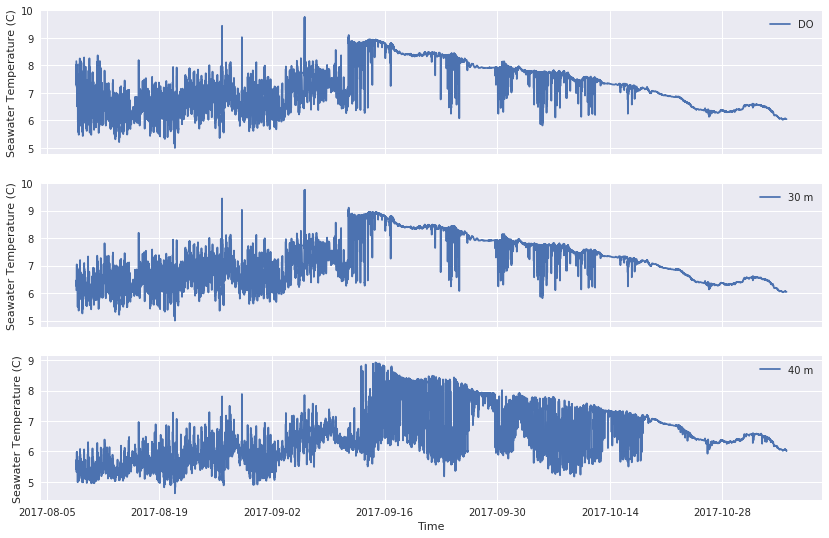

In [105]:
#Plot all 3 temperatures 
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(14,9))
l=ax1.plot(ds['time'],ds['ctdmo_seawater_temperature'], label="DO")

l2=ax2.plot(ds2['time'],ds2['ctdmo_seawater_temperature'], label="30 m")


l3=ax3.plot(ds3['time'],ds3['ctdmo_seawater_temperature'], label="40 m")

ax1.legend()
ax2.legend()
ax3.legend()

ax3.set_xlabel('Time')
ax1.set_ylabel('Seawater Temperature (C)')
ax2.set_ylabel('Seawater Temperature (C)')
ax3.set_ylabel('Seawater Temperature (C)')

In [106]:
#Plot all 3 temperatures on same plot
temp1=ds['ctdmo_seawater_temperature']
temp2=ds2['ctdmo_seawater_temperature']
temp3=ds3['ctdmo_seawater_temperature']
time1=ds['time']

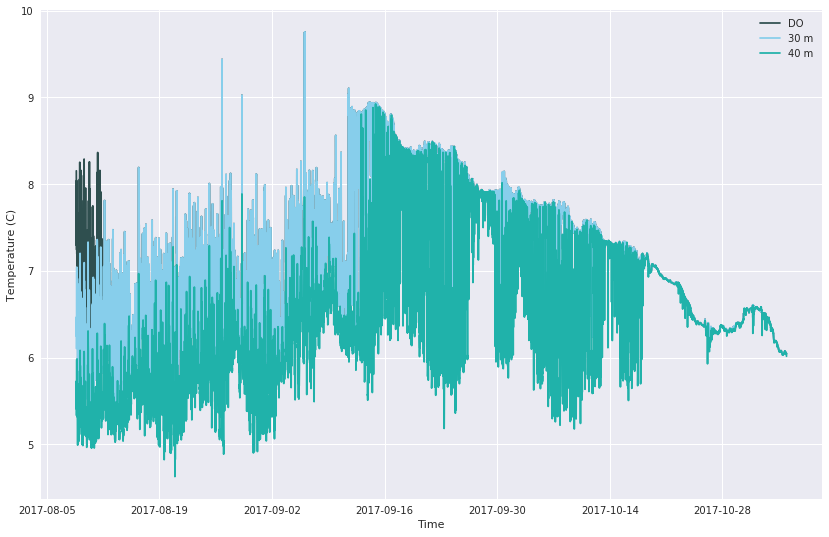

In [107]:
plt.plot(time1, temp1, color='darkslategrey', marker='_', markersize=1, label='DO')
plt.plot(time1, temp2, color='skyblue', marker='_', markersize=1, label='30 m')
plt.plot(time1, temp3, color='lightseagreen', marker='_', markersize=1, label='40 m')
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = [14,9]
plt.legend()

In [108]:
#Bokeh plot for 
time1 = list(ds['time'].values)
temp11 = list(ds['ctdmo_seawater_temperature'].values)
temp22 = list(ds2['ctdmo_seawater_temperature'].values)
temp33 = list(ds3['ctdmo_seawater_temperature'].values)

In [109]:
p = figure(width=800,
           height=400,
           title='Global Irminger Flanking Subsurface Mooring A - Temperature',
           x_axis_label='Time',
           y_axis_label='Temperature (C)',
           x_axis_type='datetime')

p.circle(time1, temp11, line_color='darkslategrey', fill_color='darkslategrey', fill_alpha=1, size=4, legend=name1)
p.circle(time1, temp22, line_color='skyblue', fill_color='skyblue', fill_alpha=1, size=4, legend=name2)
p.circle(time1, temp33, line_color='lightseagreen', fill_color='lightseagreen', fill_alpha=1, size=4, legend=name3)

p.legend.location = "top_right"
p.legend.click_policy="hide"

output_notebook()
show(p)


Loading BokehJS ...

## 3b. Annotations

In [29]:
#DO 30 m
# Specify a reference designator
refdes1 = 'GI03FLMA-RIS01-03-DOSTAD000'


#beginDT':'2017-08-08T00:00:00.000Z',
#endDT':'2017-11-05T00:00:00.000Z

#Specify a time range of interest
begin1 = int(datetime.date(2017,8,8).strftime('%s'))*1000
end1 = int(datetime.date(2017,11,5).strftime('%s'))*1000


In [34]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params1 = {
  'beginDT': begin1,
  'endDT': end1,
  'refdes': refdes1,
}

# Send the request
r1 = requests.get(ANNO_API, params=params1, auth=(USERNAME, TOKEN))
data1 = r1.json()

In [35]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [36]:
# Convert info the json response to a dataframe for easier visualization
df1 = pd.DataFrame() # Setup empty array
for d in data1:
    df1 = df1.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df1

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,Deployment 3: Secondary controller failed - no recovered_host or telemetered data expected.,694.0,None,RIS01,None,None,2016-08-30 06:00:00,2017-08-12 11:36:00,None,GI03FLMA
1,Deployment 4: Mooring was deployed 5-10m deeper than planned.,1450.0,None,None,None,None,2017-08-08 15:59:00,2018-06-15 07:59:00,None,GI03FLMA


In [37]:
#CTD 30 m

In [38]:
# Specify a reference designator
refdes2 = 'GI03FLMA-RIM01-02-CTDMOG040'

#beginDT':'2017-08-08T00:00:00.000Z',
#endDT':'2017-11-05T00:00:00.000Z

#Specify a time range of interest
begin2 = int(datetime.date(2017,8,8).strftime('%s'))*1000
end2 = int(datetime.date(2018,11,5).strftime('%s'))*1000

# # Alternatively, if you want all annotations, use these dates
# begin = int(datetime.date(2013,1,1).strftime('%s'))*1000
# end = int(datetime.datetime.now().strftime("%s")) * 1000 # current date

In [39]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params2 = {
  'beginDT': begin2,
  'endDT': end2,
  'refdes': refdes2,
}

# Send the request
r2 = requests.get(ANNO_API, params=params2, auth=(USERNAME, TOKEN))
data2 = r2.json()

In [40]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [41]:
# Convert info the json response to a dataframe for easier visualization
df2 = pd.DataFrame() # Setup empty array
for d in data2:
    df2 = df2.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df2

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,Deployment 4: Mooring was deployed 5-10m deeper than planned.,1450.0,None,None,None,None,2017-08-08 15:59:00,2018-06-15 07:59:00,None,GI03FLMA


In [42]:
#CTD 40 m

In [43]:
# Specify a reference designator
refdes3 = 'GI03FLMA-RIM01-02-CTDMOG041'


#beginDT':'2017-08-08T00:00:00.000Z',
#endDT':'2017-11-05T00:00:00.000Z

#Specify a time range of interest
begin3 = int(datetime.date(2017,8,8).strftime('%s'))*1000
end3 = int(datetime.date(2018,11,5).strftime('%s'))*1000

# # Alternatively, if you want all annotations, use these dates
# begin = int(datetime.date(2013,1,1).strftime('%s'))*1000
# end = int(datetime.datetime.now().strftime("%s")) * 1000 # current date

In [44]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params3 = {
  'beginDT': begin3,
  'endDT': end3,
  'refdes': refdes3,
}

# Send the request
r3 = requests.get(ANNO_API, params=params3, auth=(USERNAME, TOKEN))
data3 = r3.json()

In [45]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [46]:
# Convert info the json response to a dataframe for easier visualization
df3 = pd.DataFrame() # Setup empty array
for d in data3:
    df3 = df3.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df3

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,Deployment 4: Mooring was deployed 5-10m deeper than planned.,1450.0,None,None,None,None,2017-08-08 15:59:00,2018-06-15 07:59:00,None,GI03FLMA


## 4a. Describing salinity and temperature variation-Mooring B
Now let's take a look at Mooring B, at specifically salinity and temperature. We looked at the part of deployment 4 where there was DO data and concurrent CTD data. 

In [47]:
# Instrument Information: Global Irminger Flanking Subsurface Mooring B - DO 30 m

site4 = 'GI03FLMB'
node4 = 'RIS01'
instrument4 = '03-DOSTAD000'
method4 = 'recovered_host'
stream4 = 'dosta_abcdjm_sio_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site4,node4,instrument4,method4,stream4))

# All of the following are optional
params4 = {
  'beginDT':'2017-08-07T00:00:00.000Z',
  'endDT':'2017-09-29T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}



In [ ]:
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

In [ ]:
#print(data['allURLs'][0])

In [48]:
url4='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180807T162727-GI03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html'

In [49]:
single_file4 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/meredith.burke@dal.ca/20180807T162727-GI03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GI03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20170807T160001-20170928T234501.nc'

In [ ]:
# Load the data files
ds4 = xr.open_dataset(single_file4)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds4 = ds4.swap_dims({'obs': 'time'})

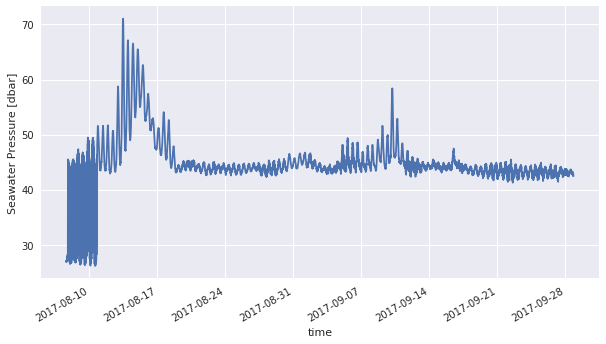

In [52]:
#Check depth
fig, (ax4) = plt.subplots(figsize=(10,5))
ds4['int_ctd_pressure'].plot();


In [ ]:
# CTD 30 m

In [53]:
#GI03FLMB-RIM01-02-CTDMOG060
site5 = 'GI03FLMB'
node5 = 'RIM01'
instrument5 = '02-CTDMOG060'
method5 = 'recovered_inst'
stream5 = 'ctdmo_ghqr_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site5,node5,instrument5,method5,stream5))

# All of the following are optional
params5 = {
  'beginDT':'2017-08-07T00:00:00.000Z',
  'endDT':'2017-09-29T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

In [ ]:
# print(data['allURLs'][0])

In [54]:
url5='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180808T165221-GI03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'

In [55]:
single_file5 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/meredith.burke@dal.ca/20180808T165221-GI03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered/deployment0004_GI03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20170807T160001-20170928T234501.nc'

In [ ]:
# Load the data files
ds5 = xr.open_dataset(single_file5)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds5 = ds5.swap_dims({'obs': 'time'})

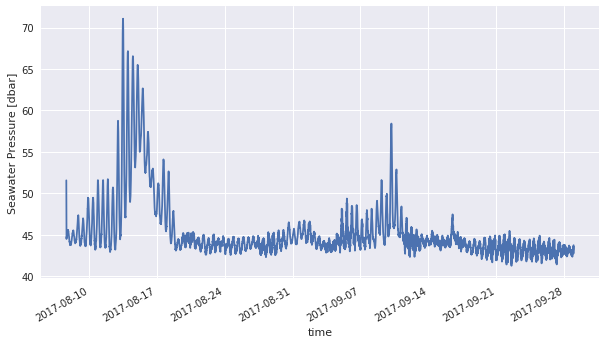

In [57]:
fig, (ax5) = plt.subplots(figsize=(10,5))
ds5['ctdmo_seawater_pressure'].plot();


In [ ]:
##CTD 40 m

In [58]:
#GI03FLMB-RIM01-02-CTDMOG061
site6 = 'GI03FLMB'
node6 = 'RIM01'
instrument6 = '02-CTDMOG061'
method6 = 'recovered_inst'
stream6 = 'ctdmo_ghqr_instrument_recovered'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site6,node6,instrument6,method6,stream6))

# All of the following are optional
params6 = {
  'beginDT':'2017-08-07T00:00:00.000Z',
  'endDT':'2017-09-29T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

In [ ]:
#print(data['allURLs'][0])

In [59]:
url6='https://opendap.oceanobservatories.org/thredds/catalog/ooi/meredith.burke@dal.ca/20180808T165040-GI03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html'

In [60]:
single_file6 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/meredith.burke@dal.ca/20180808T165040-GI03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered/deployment0004_GI03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered_20170807T160001-20170928T234501.nc'

In [ ]:
# Load the data files
ds6 = xr.open_dataset(single_file6)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds6 = ds6.swap_dims({'obs': 'time'})

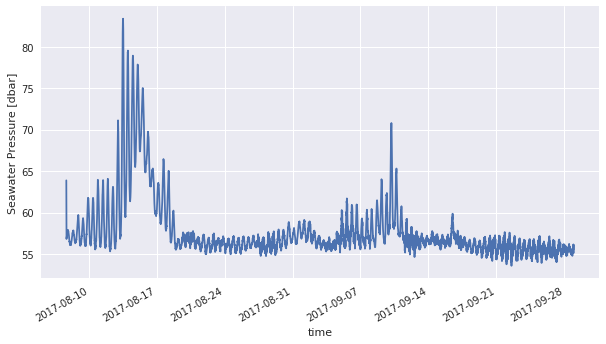

In [62]:
fig, (ax6) = plt.subplots(figsize=(10,5))
ds6['ctdmo_seawater_pressure'].plot();


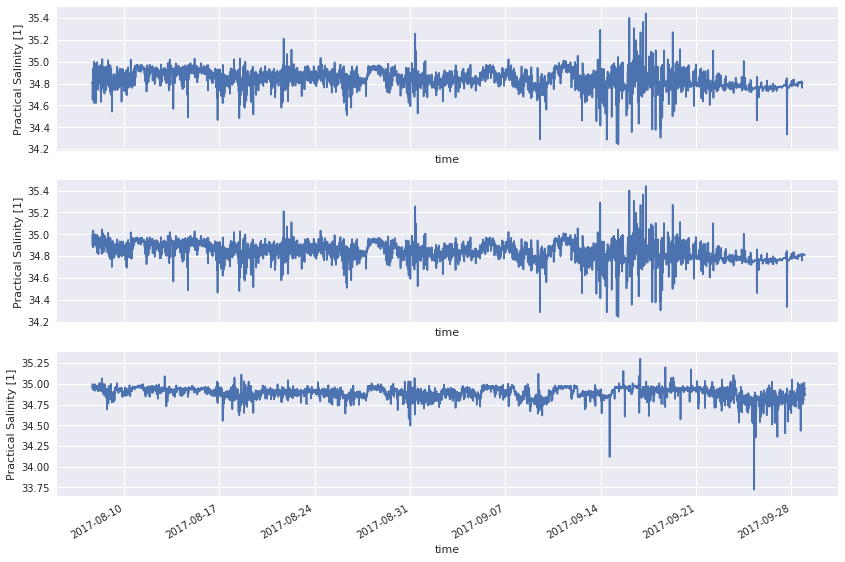

In [63]:
#Plot all 3 salinities
fig, (ax4,ax5,ax6) = plt.subplots(3,1, sharex=True, figsize=(14,9))
ds4['practical_salinity'].plot(ax=ax4)

ds5['practical_salinity'].plot(ax=ax5)


ds6['practical_salinity'].plot(ax=ax6)




In [110]:
#Plot all 3 on same plot
sal4=ds4['practical_salinity']
sal5=ds5['practical_salinity']
sal6=ds6['practical_salinity']
time2=ds4['time']

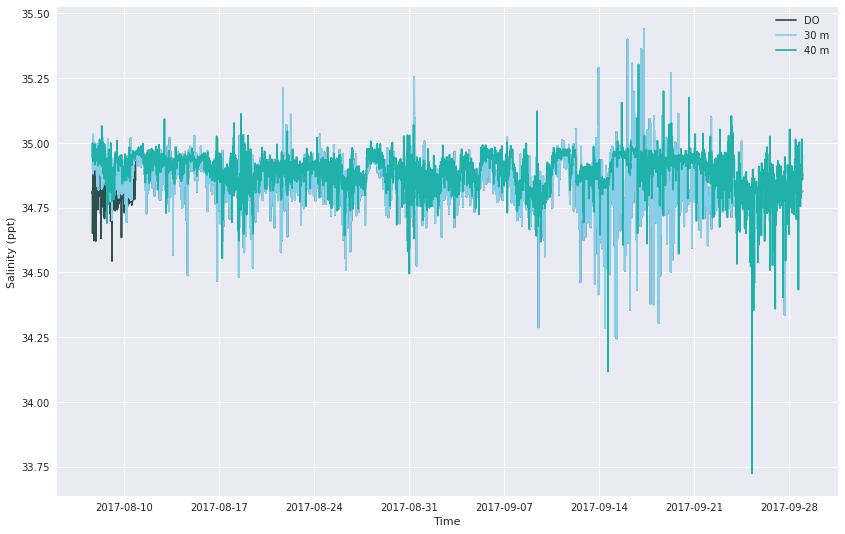

In [111]:
plt.plot(time2, sal4, color='darkslategrey', marker='_', markersize=1, label='DO')
plt.plot(time2, sal5, color='skyblue', marker='_', markersize=1, label='30 m')
plt.plot(time2, sal6, color='lightseagreen', marker='_', markersize=1, label='40 m')
plt.xlabel("Time")
plt.ylabel("Salinity (ppt)")
plt.rcParams["figure.figsize"] = [14,9]
plt.legend()

In [112]:
#Bokeh plot for 
time2 = list(ds4['time'].values)
sal44 = list(ds4['practical_salinity'].values)
sal55 = list(ds5['practical_salinity'].values)
sal66 = list(ds6['practical_salinity'].values)
name1='DO'
name2='30 m'
name3='40 m'

In [113]:
p = figure(width=800,
           height=400,
           title='Global Irminger Flanking Subsurface Mooring B - Salinity',
           x_axis_label='Time',
           y_axis_label='Salinity (ppt)',
           x_axis_type='datetime')

p.circle(time2, sal44, line_color='darkslategrey', fill_color='darkslategrey', fill_alpha=1, size=4, legend=name1)
p.circle(time2, sal55, line_color='skyblue', fill_color='skyblue', fill_alpha=1, size=4, legend=name2)
p.circle(time2, sal66, line_color='lightseagreen', fill_color='lightseagreen', fill_alpha=1, size=4, legend=name3)

p.legend.location = "top_right"
p.legend.click_policy="hide"

output_notebook()
show(p)


Loading BokehJS ...

Text(0,0.5,'Seawater Temperature (C)')

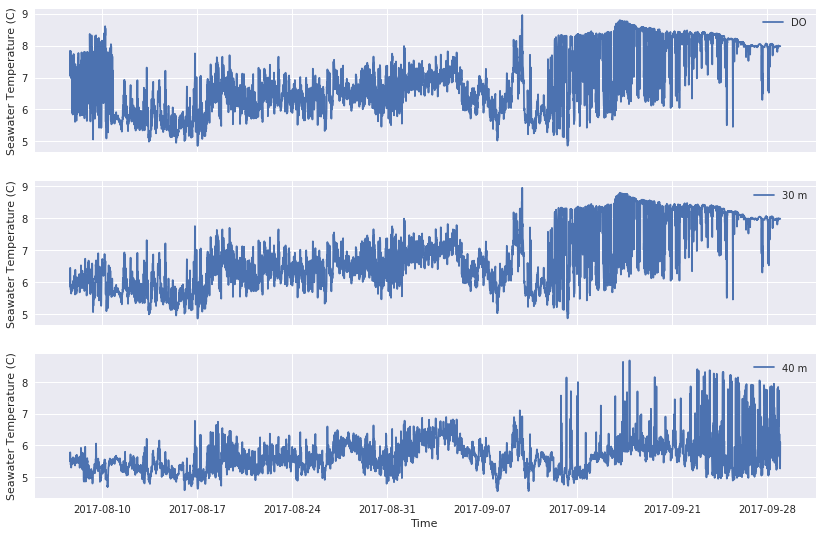

In [114]:
#Plot all 3 temperatures 
fig, (ax4,ax5,ax6) = plt.subplots(3,1, sharex=True, figsize=(14,9))
l4=ax4.plot(ds4['time'],ds4['ctdmo_seawater_temperature'], label="DO")

l5=ax5.plot(ds5['time'],ds5['ctdmo_seawater_temperature'], label="30 m")


l6=ax6.plot(ds6['time'],ds6['ctdmo_seawater_temperature'], label="40 m")

ax4.legend()
ax5.legend()
ax6.legend()

ax6.set_xlabel('Time')
ax4.set_ylabel('Seawater Temperature (C)')
ax5.set_ylabel('Seawater Temperature (C)')
ax6.set_ylabel('Seawater Temperature (C)')

In [79]:
#Plot all 3 temperatures on same plot
temp4=ds4['ctdmo_seawater_temperature']
temp5=ds5['ctdmo_seawater_temperature']
temp6=ds6['ctdmo_seawater_temperature']
time2=ds4['time']

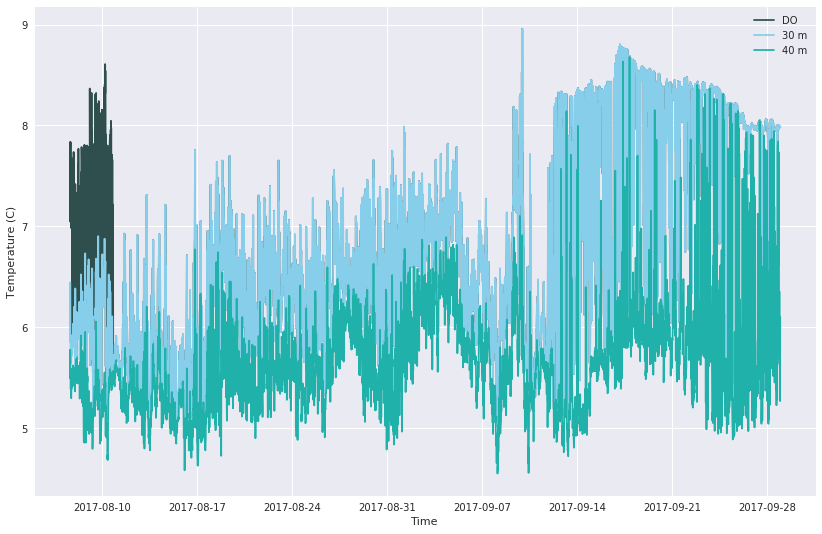

In [115]:
plt.plot(time2, temp4, color='darkslategrey', marker='_', markersize=1, label='DO')
plt.plot(time2, temp5, color='skyblue', marker='_', markersize=1, label='30 m')
plt.plot(time2, temp6, color='lightseagreen', marker='_', markersize=1, label='40 m')
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = [14,9]
plt.legend()

In [116]:
#Bokeh plot for 
time2 = list(ds4['time'].values)
temp44 = list(ds4['ctdmo_seawater_temperature'].values)
temp55 = list(ds5['ctdmo_seawater_temperature'].values)
temp66 = list(ds6['ctdmo_seawater_temperature'].values)
name1='DO'
name2='30 m'
name3='40 m'

In [117]:
p = figure(width=800,
           height=400,
           title='Global Irminger Flanking Subsurface Mooring B - Temperature',
           x_axis_label='Time',
           y_axis_label='Temperature (C)',
           x_axis_type='datetime')

p.circle(time2, temp44, line_color='darkslategrey', fill_color='darkslategrey', fill_alpha=1, size=4, legend=name1)
p.circle(time2, temp55, line_color='skyblue', fill_color='skyblue', fill_alpha=1, size=4, legend=name2)
p.circle(time2, temp66, line_color='lightseagreen', fill_color='lightseagreen', fill_alpha=1, size=4, legend=name3)

p.legend.location = "top_right"
p.legend.click_policy="hide"

output_notebook()
show(p)


Loading BokehJS ...

## 4b. Annotations

In [83]:
#DO 30 m
# Specify a reference designator
refdes4 = 'GI03FLMB-RIS01-03-DOSTAD000'

#Specify a time range of interest
begin4 = int(datetime.date(2017,8,7).strftime('%s'))*1000
end4 = int(datetime.date(2017,9,29).strftime('%s'))*1000


In [84]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params4 = {
  'beginDT': begin4,
  'endDT': end4,
  'refdes': refdes4,
}

# Send the request
r4 = requests.get(ANNO_API, params=params4, auth=(USERNAME, TOKEN))
data4 = r4.json()

In [85]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [86]:
# Convert info the json response to a dataframe for easier visualization
df4 = pd.DataFrame() # Setup empty array
for d in data4:
    df4 = df4.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df4

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,"Deployment 3: Secondary controller failed - no leak was detected, but the battery for the controller board was drained at recovery. No recovered_host or telemetered data expected.",696.0,None,RIS01,None,None,2017-01-12 18:15:00,2017-08-11 12:02:00,None,GI03FLMB
1,Deployment 4: Mooring was deployed 10-15m deeper than planned.,1453.0,None,None,None,None,2017-08-07 15:49:00,2018-06-11 19:36:00,None,GI03FLMB


In [87]:
#CTD 30 m

In [88]:
# Specify a reference designator
refdes5 = 'GI03FLMB-RIM01-02-CTDMOG060'

#Specify a time range of interest
begin5 = int(datetime.date(2017,8,7).strftime('%s'))*1000
end5 = int(datetime.date(2017,9,29).strftime('%s'))*1000



In [89]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params5 = {
  'beginDT': begin5,
  'endDT': end5,
  'refdes': refdes5,
}

# Send the request
r5 = requests.get(ANNO_API, params=params5, auth=(USERNAME, TOKEN))
data5 = r5.json()

In [90]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [91]:
# Convert info the json response to a dataframe for easier visualization
df5 = pd.DataFrame() # Setup empty array
for d in data5:
    df5 = df5.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df5

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,Deployment 4: Mooring was deployed 10-15m deeper than planned.,1453.0,None,None,None,None,2017-08-07 15:49:00,2018-06-11 19:36:00,None,GI03FLMB


In [92]:
#CTD 40 m

In [93]:
# Specify a reference designator
refdes6 = 'GI03FLMB-RIM01-02-CTDMOG061'

#Specify a time range of interest
begin6 = int(datetime.date(2017,8,9).strftime('%s'))*1000
end6 = int(datetime.date(2017,9,29).strftime('%s'))*1000


In [94]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params6 = {
  'beginDT': begin6,
  'endDT': end6,
  'refdes': refdes6,
}

# Send the request
r6 = requests.get(ANNO_API, params=params6, auth=(USERNAME, TOKEN))
data6 = r6.json()

In [95]:
# convert timestamps
def convert_time(ms):
    if ms != None:
        return datetime.datetime.utcfromtimestamp(ms/1000)
    else:
        return None

In [96]:
# Convert info the json response to a dataframe for easier visualization
df6 = pd.DataFrame() # Setup empty array
for d in data6:
    df6 = df6.append({
        'annotation_id': d['id'],
        'subsite': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'stream': d['stream'],
        'method': d['method'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'qcFlag': d['qcFlag'],
        'annotation': d['annotation']
    }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df6

,annotation,annotation_id,method,node,qcFlag,sensor,start,stop,stream,subsite
0,Deployment 4: Mooring was deployed 10-15m deeper than planned.,1453.0,None,None,None,None,2017-08-07 15:49:00,2018-06-11 19:36:00,None,GI03FLMB


## 5. Conclusions
Calibrations: CTDs not calibrated in 2017 on either mooring. The 30 m CTD is used to calibrate the DO sensor, and as the CTD could be off from the lack of its own calibration, this could be the reason for the fluctuations and strong outliers. 

Originally, a possible explanation for the rapid fluctuations in temperature and salinity in the CTD 40m data at Mooring A was that there was a mixed layer around that depth, however, after comparing mooring A and B, there was not that degree of variation at 40 m on Mooring B. They are 40 km apart, however in the open ocean, it should be relatively uniform. 

At Mooring B, the CTD at 40 m shows less variation in salintiy and temperature than the other two sensors, which was opposite at Mooring A.

Lastly, there are quite large fluctuations in depth at Mooring B. Once in August and once in September there was a change in depth of 15-20 m. This could be due to a large storm event.